 # Analásis de sonidos de la rana  Coquí Eleutherodactylus johnstonei
 
<img src="./img/coqui.jpg" width=275 height=275 /> 

Info en [wiki](https://es.wikipedia.org/wiki/Coqu%C3%AD_antillano)

In [5]:
%matplotlib inline

import os
import IPython.display as ipd
import librosa
import numpy as np

import matplotlib.pyplot as plt
import librosa.display

In [1]:
!ls ./sound

Ensoniq-SQ-2-Piano-C4.wav  rana3a.wav	     snap.wav
Guitar-C4.wav		   ruido_blanco.wav


In [2]:
rana = "./sound/rana3a.wav"

In [6]:
ipd.Audio(rana)

# Análisis del sonido con librosa

In [7]:
Data, sr  = librosa.load(rana)
print("data shape = {}, sample rate = {}".format(Data.shape, sr ))

data shape = (647680,), sample rate = 22050


Text(0.5, 0, 'tiempo (s)')

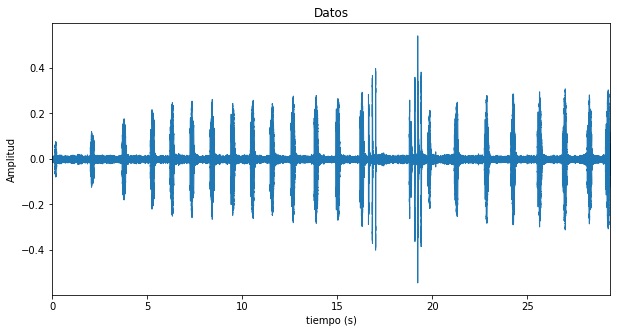

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
librosa.display.waveplot(Data, sr=sr)
plt.title('Datos')
plt.ylabel('Amplitud')
plt.xlabel('tiempo (s)')

In [16]:
''' 
Detalles del audio
'''
t0, t1 = 10.365, 10.650
n0, n1 = int(t0*sr), int(t1*sr)
segmento = Data[n0:n1]
segmento.shape

(6284,)

Text(0.5, 0, 'tiempo en segundos empezando en 10.365')

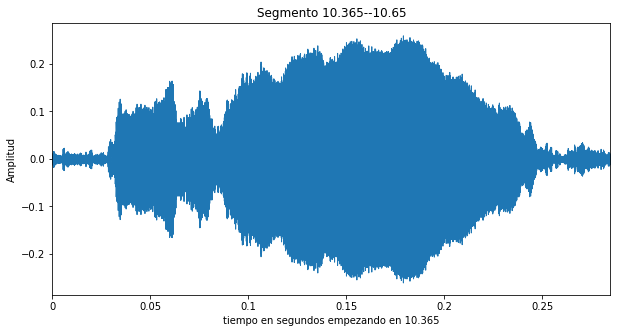

In [18]:
''' 
Detalle gráfico mediante librosa
'''
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
librosa.display.waveplot(segmento, sr=sr)
plt.title("Segmento {}--{}".format(t0, t1 ))
plt.ylabel('Amplitud')
plt.xlabel("tiempo en segundos empezando en {}".format(t0 ))

(-0.3, 0.3)

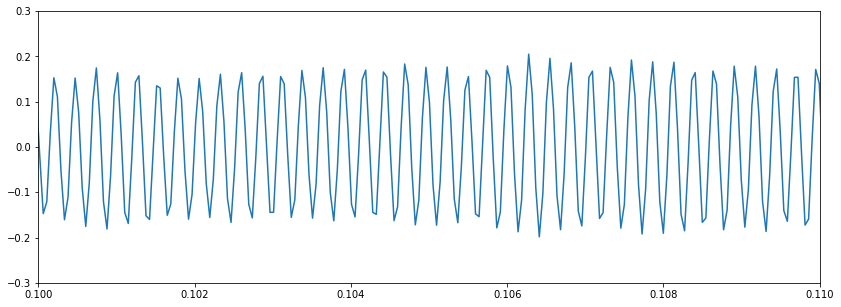

In [30]:
''' 
Detalle gráfico mediante numpy
'''
timeDomain = np.linspace(0,(n1-n0)/sr,n1-n0)
plt.figure(figsize=(14, 5))
#librosa.display.waveplot(s_p, sr=srg)
plt.plot(timeDomain, segmento)
plt.xlim((0.1, 0.11)) 
plt.ylim((-0.3, 0.3)) 

## Transformada de Fourier y Espectrogramas  

### Análisis de Fourier de los sonidos

Con la transformada de Fourier descomponemos un trozo de la señal (segmento) en sus frecuencias constitutivas. Desde luego, esto es artesanal y sólo se pone para ilustrar el significado del espectrograma

In [31]:
nn, timestep = n1-n0, 1/sr 
Seg= np.fft.rfft(segmento) 
frec = np.fft.rfftfreq(nn,d=timestep)

Text(0.5, 0, 'Hz')

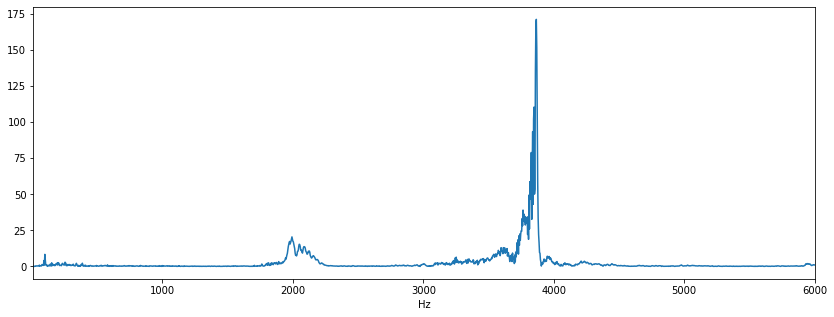

In [32]:
plt.figure(figsize=(14, 5))
plt.plot(frec, np.abs(Seg))

plt.xlim((10, 6000)) 
plt.xlabel("Hz")

### Espectrogramas en Librosa

Librosa permite la descomposición en frecuencias de toda la señal mediante el Espectrograma

In [33]:
X = librosa.stft(segmento)
Xdb  = librosa.amplitude_to_db(abs(X)) 

Text(0.5, 0, 'Tiempo s')

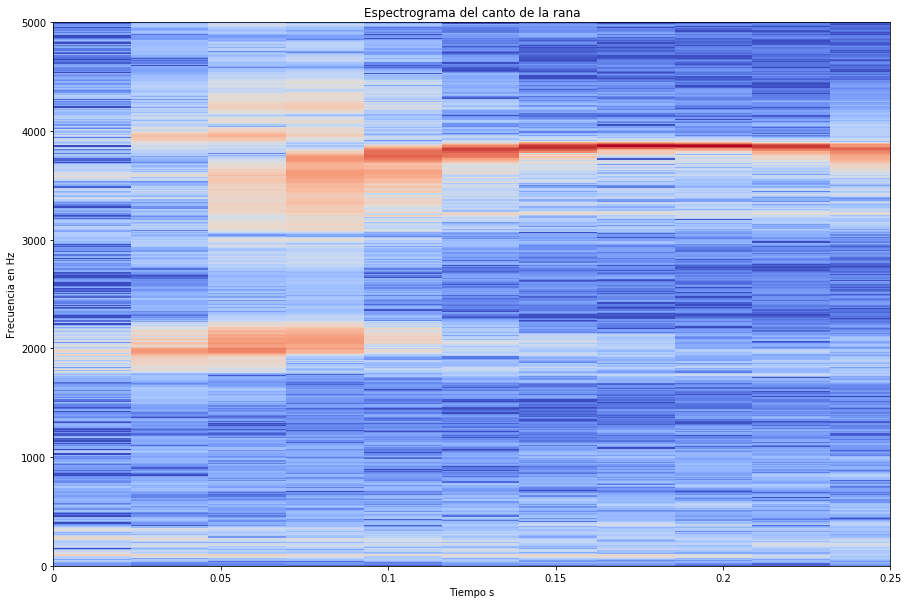

In [34]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 1, 1)
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.xlim((0.0, 0.25))  
plt.ylim((0, 5000)) 
plt.title('Espectrograma del canto de la rana')
plt.ylabel('Frecuencia en Hz')
plt.xlabel('Tiempo s')


## Exportar a formatos tradicionales de  audio

librosa.output.write_wav saves a NumPy array to a WAV file.


In [27]:
librosa.output.write_wav("./sound/ruido_blanco.wav", wn, sr= srp)
librosa.output.write_wav("./sound/snap.wav", wn, sr= srp)